# 作为公众议题的雾霾：天涯论坛关于雾霾问题的讨论

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [38]:
dtt = []
with open('/Users/chengjun/bigdata/wumai/tianya_bbs_wumai_network.txt', 'r') as f:
    for line in f:
        pnum, link, time, author_id, author, content = line.replace('\n', '').split('\t')
        dtt.append([pnum, link, time, author_id, author, content])
len(dtt)

25301

In [39]:
import pandas as pd
dt = pd.DataFrame(dtt)
dt=dt.rename(columns = {0:'page_num', 1:'link', 2:'time', 3:'author',4:'author_name', 5:'reply'})
dt[:5]

,page_num,link,time,author,author_name,reply
0,1,/post-free-5336468-1.shtml,2015-12-15 21:35:00,29979936,yzxyz117,暂缓油价下调控雾霾，发改委竟然出新高度 文/维扬卧龙 发改委：我国一些地区以臭氧、灰霾为...
1,1,/post-free-5336468-1.shtml,2015-12-15 21:44:04,7148818,cl0931,认真你就输了 不反过来加你雾霾税已经很好了 还不谢主隆恩 不过以它们的尿性 快了
2,1,/post-free-5336468-1.shtml,2015-12-15 21:45:28,97274354,过客zcj,前排围观
3,1,/post-free-5336468-1.shtml,2015-12-15 21:47:02,62967252,上海曹氏,雾霾严重，是不是油价应该大涨啊？或者关掉一些汽车厂，但不是说还要汽车下乡吗？
4,1,/post-free-5336468-1.shtml,2015-12-15 21:48:10,10369361,gotyoursoul,天涯还可以说，搜狐、新浪、凤凰已经不允许了。


In [40]:
len(set(dt.link))

1936

In [41]:
dt[-1:]

,page_num,link,time,author,author_name,reply
25300,1,/post-free-4838848-1.shtml,2014-12-15 14:18:00,97257141,一心一意RB,玖信贷支招：如何防“地铁雾霾” 近日有媒体爆出地下PM2.5数值相当于室外16倍，“地铁雾...


In [42]:
date = map(lambda x: x[:10], dt.time)
dt['date'] = pd.to_datetime(date)

In [43]:
# convert str to datetime format
dt.time = pd.to_datetime(dt.time)
dt['month'] = dt.time.dt.month
dt['year'] = dt.time.dt.year
dt['day'] = dt.time.dt.day
type(dt.time[0])

pandas.tslib.Timestamp

In [143]:
dt[:2]

,page_num,link,time,author,author_name,reply,date,month,year,day
0,1,/post-free-5336468-1.shtml,2015-12-15 21:35:00,29979936,yzxyz117,暂缓油价下调控雾霾，发改委竟然出新高度 文/维扬卧龙 发改委：我国一些地区以臭氧、灰霾为...,2015-12-15,12,2015,15
1,1,/post-free-5336468-1.shtml,2015-12-15 21:44:04,7148818,cl0931,认真你就输了 不反过来加你雾霾税已经很好了 还不谢主隆恩 不过以它们的尿性 快了,2015-12-15,12,2015,15


## 找到主帖子

In [278]:
len(threads)

1953

In [44]:
d = dt.year.value_counts()
dd = pd.DataFrame(d)
dd = dd.sort_index(axis=0, ascending=True)
ds = dd.cumsum()

In [45]:
def getDate(dat):
    dat_date_str = map(lambda x: str(x) +'-01-01', dat.index)
    dat_date = pd.to_datetime(dat_date_str)
    return dat_date

ds.date = getDate(ds)
dd.date = getDate(dd)

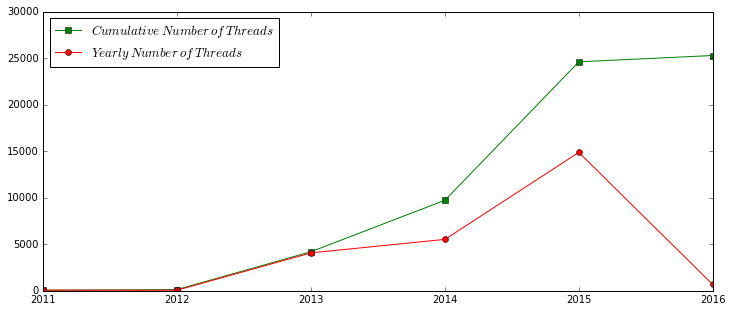

In [46]:
fig = plt.figure(figsize=(12,5))
plt.plot(ds.date, ds.year, 'g-s', label = '$Cumulative\: Number\:of\: Threads$')
plt.plot(dd.date, dd.year, 'r-o', label = '$Yearly\:Number\:of\:Threads$')
#plt.yscale('log')
plt.legend(loc=2,numpoints=1,fontsize=13)
plt.show()

In [47]:
import re
for k, tweet in enumerate(dt.reply[:100]):
    tweet = tweet.decode('utf8')
    RTpattern = r'''@(\w+)\s'''
    for person in re.findall(RTpattern, tweet, re.UNICODE):
        print k,'\t',dt.author_name[k],'\t', person,'\t\t', tweet[:30]

41 	wslwslqqqq 	gotyoursoul 		@gotyoursoul  8楼  2015-12-15 2
53 	贾庄当真 	yzxyz117 		@yzxyz117 发改委
80 	誌伟 	大器晚成到何时 		@大器晚成到何时 12楼 2015-12-15 21:51　
97 	猫的夹 	zyzlzg 		@zyzlzg 2015-12-16 14:21:09　　帖


In [48]:
import pandas as pd

df = pd.read_csv('/Users/chengjun/bigdata/wumai/tianya_bbs_wumai_threads_list.txt', sep = "\t", header=None)
df=df.rename(columns = {0:'title', 1:'link', 2:'author',3:'author_page', 4:'click', 5:'reply', 6:'time'})
df[:2]

,title,link,author,author_page,click,reply,time
0,"暂缓油价下调控雾霾,发改委竟然出新高度",/post-free-5336468-1.shtml,yzxyz117,http://www.tianya.cn/29979936,236290,1854,2015-12-15 21:35
1,"女儿患肿瘤,柴静自费百万调查雾霾",/post-free-4975052-1.shtml,化成大明,http://www.tianya.cn/95716028,216517,2280,2015-02-28 15:39


In [66]:
from collections import defaultdict

link_user_dict = defaultdict(list)

for i in range(len(dt)):
    link_user_dict[dt.link[i]].append(dt.author[i])

In [69]:
df['user'] = [len(link_user_dict[l]) for l in df.link]
df[:2] 

,title,link,author,author_page,click,reply,time,user
0,"暂缓油价下调控雾霾,发改委竟然出新高度",/post-free-5336468-1.shtml,yzxyz117,http://www.tianya.cn/29979936,236290,1854,2015-12-15 21:35,679
1,"女儿患肿瘤,柴静自费百万调查雾霾",/post-free-4975052-1.shtml,化成大明,http://www.tianya.cn/95716028,216517,2280,2015-02-28 15:39,2123


In [284]:
df.title

0                    暂缓油价下调控雾霾,发改委竟然出新高度
1                       女儿患肿瘤,柴静自费百万调查雾霾
2                     【老墨杂弹】 雾霾中想起消失了的柴静
3                    贴一张照片看看你所在的地方雾霾是否严重
4                  【云卷云舒】 雾霾越治越凶的原因原来是这样
5                       柴静反雾霾,充当了反华势力的棋子
6             PM值2.5  小女子捧着鱼缸看雾霾中的北京(组图)
7                  【鱼眼看世界】"张召忠雾霾御敌"可有深意?
8             来自天堂的雾霾——呼唤司法公正,惩治腐败!!!!!!
9       论高油价治雾霾----天涯杂谈一周要闻(12.14-12.20)
10               【风青杨时评】中国有多少超级富豪因雾霾而移民?
11               【久哥扯淡】 中国普通民众为何不能享受雾霾补贴
12                         来一场狂风把雾霾立刻赶走吧
13          【民间语文第321期】霾时代:社科院称雾霾会影响生殖能力
14               【梓福闲评】 汽油2.7元1升,美国不怕雾霾?
15          【民间语文398期】 雾霾中,我看到了中产阶层的致命弱点
16                 【热议】柴静与雾霾的恩怨是全体中国人的恩怨
17                                  雾霾围城
18                【风青杨专栏】雾霾下北京马拉松到底该不该跑?
19            严重雾霾天气 沈阳PM2.5浓度过千.找亮点(有图)
20                 【梓福闲评】 雾霾天再读《别了,骆氏家辉》
21                        别让烟花爆竹当雾霾"临时工"
22                    震精了,持续雾霾的原因难道是风电??
23                         保定的孩子,请别为雾霾哭泣
24          【墨子时

# 回帖的时间分布

In [90]:
date = map(lambda x: x[:10], df.time)
df['date'] = pd.to_datetime(date)

In [91]:
d = dt.date.value_counts()
dd = pd.DataFrame(d)
dd = dd.sort_index(axis=0, ascending=True)
ds = dd.cumsum()

In [94]:
dd[:5]

,date
2011-10-11,11
2011-10-12,2
2011-12-07,2
2011-12-14,1
2011-12-16,1


In [112]:
' '.join(dir(plt))

'Annotation Arrow Artist AutoLocator Axes Button Circle Figure FigureCanvasBase FixedFormatter FixedLocator FormatStrFormatter Formatter FuncFormatter GridSpec IndexLocator Line2D LinearLocator Locator LogFormatter LogFormatterExponent LogFormatterMathtext LogLocator MaxNLocator MultipleLocator Normalize NullFormatter NullLocator PolarAxes Polygon Rectangle ScalarFormatter Slider Subplot SubplotTool Text TickHelper Widget _INSTALL_FIG_OBSERVER _IP_REGISTERED __builtins__ __doc__ __file__ __name__ __package__ _auto_draw_if_interactive _autogen_docstring _backend_mod _backend_selection _imread _imsave _interactive_bk _pylab_helpers _setp _setup_pyplot_info_docstrings _show _string_to_bool absolute_import acorr angle_spectrum annotate arrow autoscale autumn axes axhline axhspan axis axvline axvspan bar barbs barh bone box boxplot broken_barh cla clabel clf clim close cm cohere colorbar colormaps colors connect contour contourf cool copper csd cycler dedent delaxes disconnect division docs

In [118]:
dir(plt.legend.func_defaults)

['__class__',
 '__delattr__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

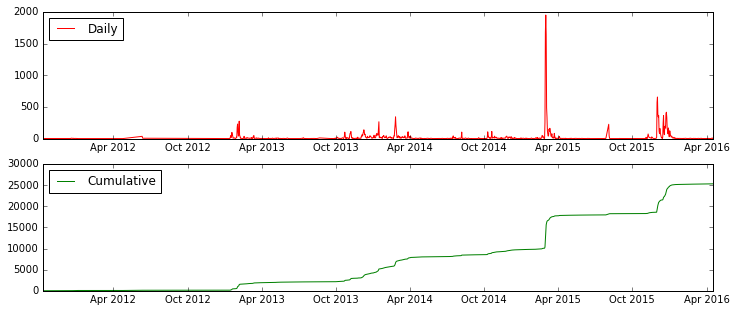

In [120]:
fig = plt.figure(figsize=(12,5))
ax= plt.subplot(211)
plt.plot(dd, 'r-', label = 'Daily')
plt.legend(loc = 2)
ax= plt.subplot(212)
plt.plot(ds, 'g-', label = 'Cumulative')
plt.legend(loc = 2)
#plt.yscale('log')
plt.show()

# 参与者-回复的超线性/幂律关系

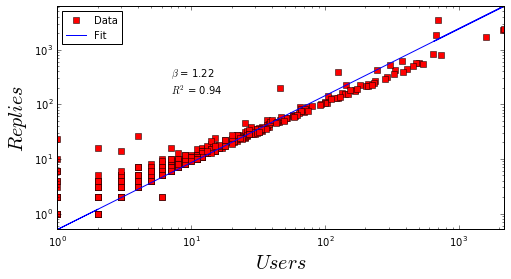

In [85]:
import statsmodels.api as sm
  
x = np.log(df.user+1)
y = np.log(df.reply+1)
xx = sm.add_constant(x, prepend=True)
res = sm.OLS(y,xx).fit()
constant,beta = res.params
r2 = res.rsquared
fig = plt.figure(figsize=(8, 4),facecolor='white')
plt.plot(df.user, df.reply, 'rs', label= 'Data')
plt.plot(np.exp(x), np.exp(constant + x*beta),"-", label = 'Fit')
plt.yscale('log');plt.xscale('log')
plt.xlabel(r'$Users$', fontsize = 20)
plt.ylabel(r'$Replies$', fontsize = 20)
plt.text(max(df.user)/300,max(df.reply)/20,
         r'$\beta$ = ' + str(round(beta,2)) +'\n' + r'$R^2$ = ' + str(round(r2, 2)))
plt.legend(loc=2,fontsize=10, numpoints=1)
plt.axis('tight')
plt.show()

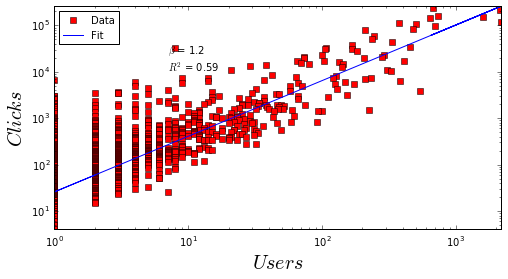

In [121]:
x = np.log(df.user+1)
y = np.log(df.click+1)
xx = sm.add_constant(x, prepend=True)
res = sm.OLS(y,xx).fit()
constant,beta = res.params
r2 = res.rsquared
fig = plt.figure(figsize=(8, 4),facecolor='white')
plt.plot(df.user, df.click, 'rs', label= 'Data')
plt.plot(np.exp(x), np.exp(constant + x*beta),"-", label = 'Fit')
plt.yscale('log');plt.xscale('log')
plt.xlabel(r'$Users$', fontsize = 20)
plt.ylabel(r'$Clicks$', fontsize = 20)
plt.text(max(df.user)/300,max(df.click)/20,
         r'$\beta$ = ' + str(round(beta,2)) +'\n' + r'$R^2$ = ' + str(round(r2, 2)))
plt.legend(loc=2,fontsize=10, numpoints=1)
plt.axis('tight')
plt.show()

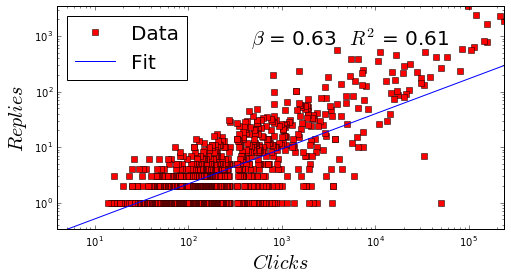

In [141]:
x = np.log(df.click+1)
y = np.log(df.reply+1)
xx = sm.add_constant(x, prepend=True)
res = sm.OLS(y,xx).fit()
constant,beta = res.params
r2 = res.rsquared
fig = plt.figure(figsize=(8, 4),facecolor='white')
plt.plot(df.click, df.reply, 'rs', label= 'Data')
plt.plot(np.exp(x), np.exp(constant + x*beta),"-", label = 'Fit')
plt.yscale('log');plt.xscale('log')
plt.xlabel(r'$Clicks$', fontsize = 20)
plt.ylabel(r'$Replies$', fontsize = 20)
plt.text(max(df.click)/500,max(df.reply)/5,
         r'$\beta$ = ' + str(round(beta,2)) +'\t' + r'$R^2$ = ' + str(round(r2, 2)), fontsize = 20)
plt.legend(loc=2,fontsize=20, numpoints=1)
plt.axis('tight')
plt.show()

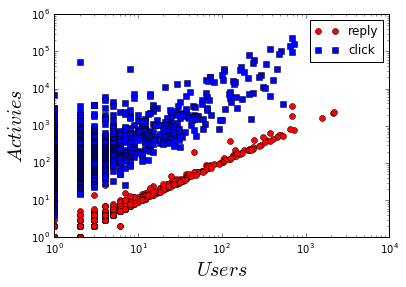

In [88]:
plt.plot(df.user, df.reply, 'ro', label = 'reply')
plt.plot(df.user, df.click, 'bs', label = 'click')
plt.yscale('log');plt.xscale('log')
plt.xlabel(r'$Users$', fontsize = 20)
plt.ylabel(r'$Activies$', fontsize = 20)
plt.legend()
plt.show()

# 文本挖掘

In [142]:
import jieba

In [149]:
from collections import Counter, defaultdict

wordfreqs = defaultdict(int)
txt = r' '.join(dt.reply[0].decode('utf8'))
seg_alist = jieba.cut(txt, cut_all=False)
for i in seg_alist:
    wordfreqs[i] +=1
wordfreqs = sorted(wordfreqs.items(), key = lambda x:-x[1]) 

In [147]:
print dt.reply[0]

暂缓油价下调控雾霾，发改委竟然出新高度　　文/维扬卧龙　　发改委：我国一些地区以臭氧、灰霾为特征的复合型污染日益突出，汽车尾气排放是空气污染重要原因之一。发挥成品油价格杠杆作用，是治理大气污染重要手段。低油价时保持油价稳定，有利于改善空气质量。国内成品油价格形成机制将进一步完善。　　现行成品油定价机制是由国家发展改革委、财政部、交通部等部门联合制定的，规定国际油价连续22个工作日日均涨幅或跌幅超过4%，就应考虑对国内成品油价格进行调整，以使成品油价格能够更真实、更灵敏地反映市场供求关系，促进资源合理利用与公平竞争。在国际油价上行期间，我们发改委及时和国际接轨执行了这项规定。　　发改委想不到的是，俄罗斯野心膨胀对乌克兰使上了坏心眼，致使克罗米亚独立遭到国际制裁，油价一路下行，从最初的110美元/桶直到现在36美元/桶，还有继续下行的趋势。在去年国际油价开始下行时，我们的发改委还挺硬气，跟着下调，在九连跌后扛不住，找出了一个消费税的由头开始征消费税，可国际油价还是没买账，继续下行，我们在一个半月内三次上调消费税，抵消油价下行的影响。　　随后的国际油价逐步缓升，可是我们的发改委也跟着上调油价，可是对消费税视而不见。油价下行上调消费税的理由，到了油价上涨时，全部隐身不约了。现在国际社会整治俄罗斯，油价都跌到36美元/桶，我们的发改委直接来一个暂缓油价下调要保证油价稳定，说这样利于改善空气质量，见过这么无耻耍赖的政府么？自己定的规则自己破，还让人怎么玩？　　虽然汽油尾气能够造成空气污染，但是雾霾的罪魁是那些高污染的企业，而不是那些汽车尾气！阅兵蓝、APEK蓝，早就证明这一点，否则为什么阅兵时、开APEK大会时要关停企业，而不是只提高油价限制上路车辆数？如果说路上车太堵太密造成，拉各斯、伦敦、纽约、东京无论是道路密度还是轨道密度都超过我国最堵城市北京，为什么他们是碧水蓝天？　　汽车尾气给大气造成污染，那不是汽油价格的问题，而是汽油品质的问题！现在欧洲的油便宜，但是他们的油品质量更高。我国出口香港的石油都比国内品质好，国内也就是北京的油品最高含硫最少，国内大部分地区仍使用国III标准的汽油，哈尔滨、河北、河南、山东等地则使用乙醇汽油，部分地区的柴油则是国II标准。　　发改委想控制雾霾改善大气质量，要干的不是稳定油价，而是督促三桶油制造清洁能源提高油品技术。汽油是基础能源，不是可有

In [153]:
for a, b in wordfreqs[:5]: print a, b

  1093
， 55
油 37
的 28
价 26


In [158]:
def get_wordfreq(index):
    wordfreqs = defaultdict(int)
    txt = dt.reply[index].decode('utf8')
    seg_alist = jieba.cut(txt, cut_all=False)
    for i in seg_alist:
        wordfreqs[i] +=1
    return dt.date[index], wordfreqs.items()

print get_wordfreq(100)

(Timestamp('2015-12-16 00:00:00'), [(u'\u3002', 1), (u'\u9876', 1), (u'\uff0c', 1), (u'\u8bf4\u5f97\u597d', 1)])


In [161]:
print dt.reply[50]

威武我中国梦。


In [163]:
a, b =  get_wordfreq(50)
for i, j in b: print i,j

我 1
中国 1
梦 1
。 1
威武 1


In [169]:
import jieba.analyse
txt =dt.reply[0]
tf = jieba.analyse.extract_tags(txt, topK=200, withWeight=True)

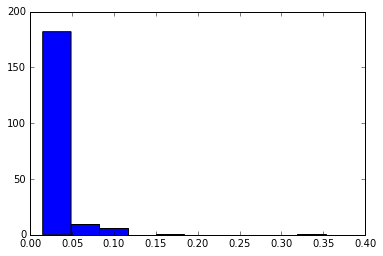

In [171]:
plt.hist([i[1] for i in tf])
plt.show()

In [172]:
tr = jieba.analyse.textrank(txt,topK=200, withWeight=True)
print u"、".join([i[0] for i in tr[:50]])

油价、成品油、国际、汽油、下行、价格、造成、消费税、油品、机制、污染、提高、密度、改善、地区、汽车尾气、问题、促进、上调、企业、使用、可笑、只能、能源、借口、超过、规定、空气质量、资源、下调、俄罗斯、道路、编造、暴露、能够、成本、品质、技术、石油、使上、跟着、耍赖、高度、维扬、车辆、政府、出新、卧龙、影响、河北


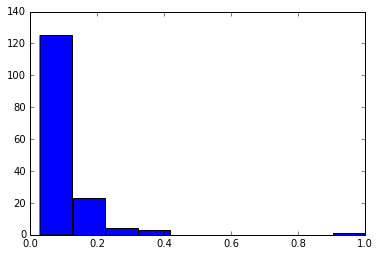

In [173]:
plt.hist([i[1] for i in tr])
plt.show()

In [212]:
import pandas as pd
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #指定默认字体 
matplotlib.rc("savefig", dpi=300)

def keywords(txt):
    tf = jieba.analyse.extract_tags(txt, topK=200, withWeight=True)
    tr = jieba.analyse.textrank(txt,topK=200, withWeight=True)
    tfdata = pd.DataFrame(tf, columns=['word', 'tfidf'])
    trdata = pd.DataFrame(tr, columns=['word', 'textrank'])
    worddata = pd.merge(tfdata, trdata, on='word')
    plt.plot(worddata.tfidf, worddata.textrank, linestyle='',marker='.')
    for i in range(len(worddata.word)):
        plt.text(worddata.tfidf[i], worddata.textrank[i], worddata.word[i], 
                 fontsize = worddata.textrank[i]*35, color = 'red', rotation = 0)
    plt.title(txt[:4])
    plt.yscale('log');plt.xscale('log')
    plt.xlabel('Tf-Idf')
    plt.ylabel('TextRank')
    plt.show()

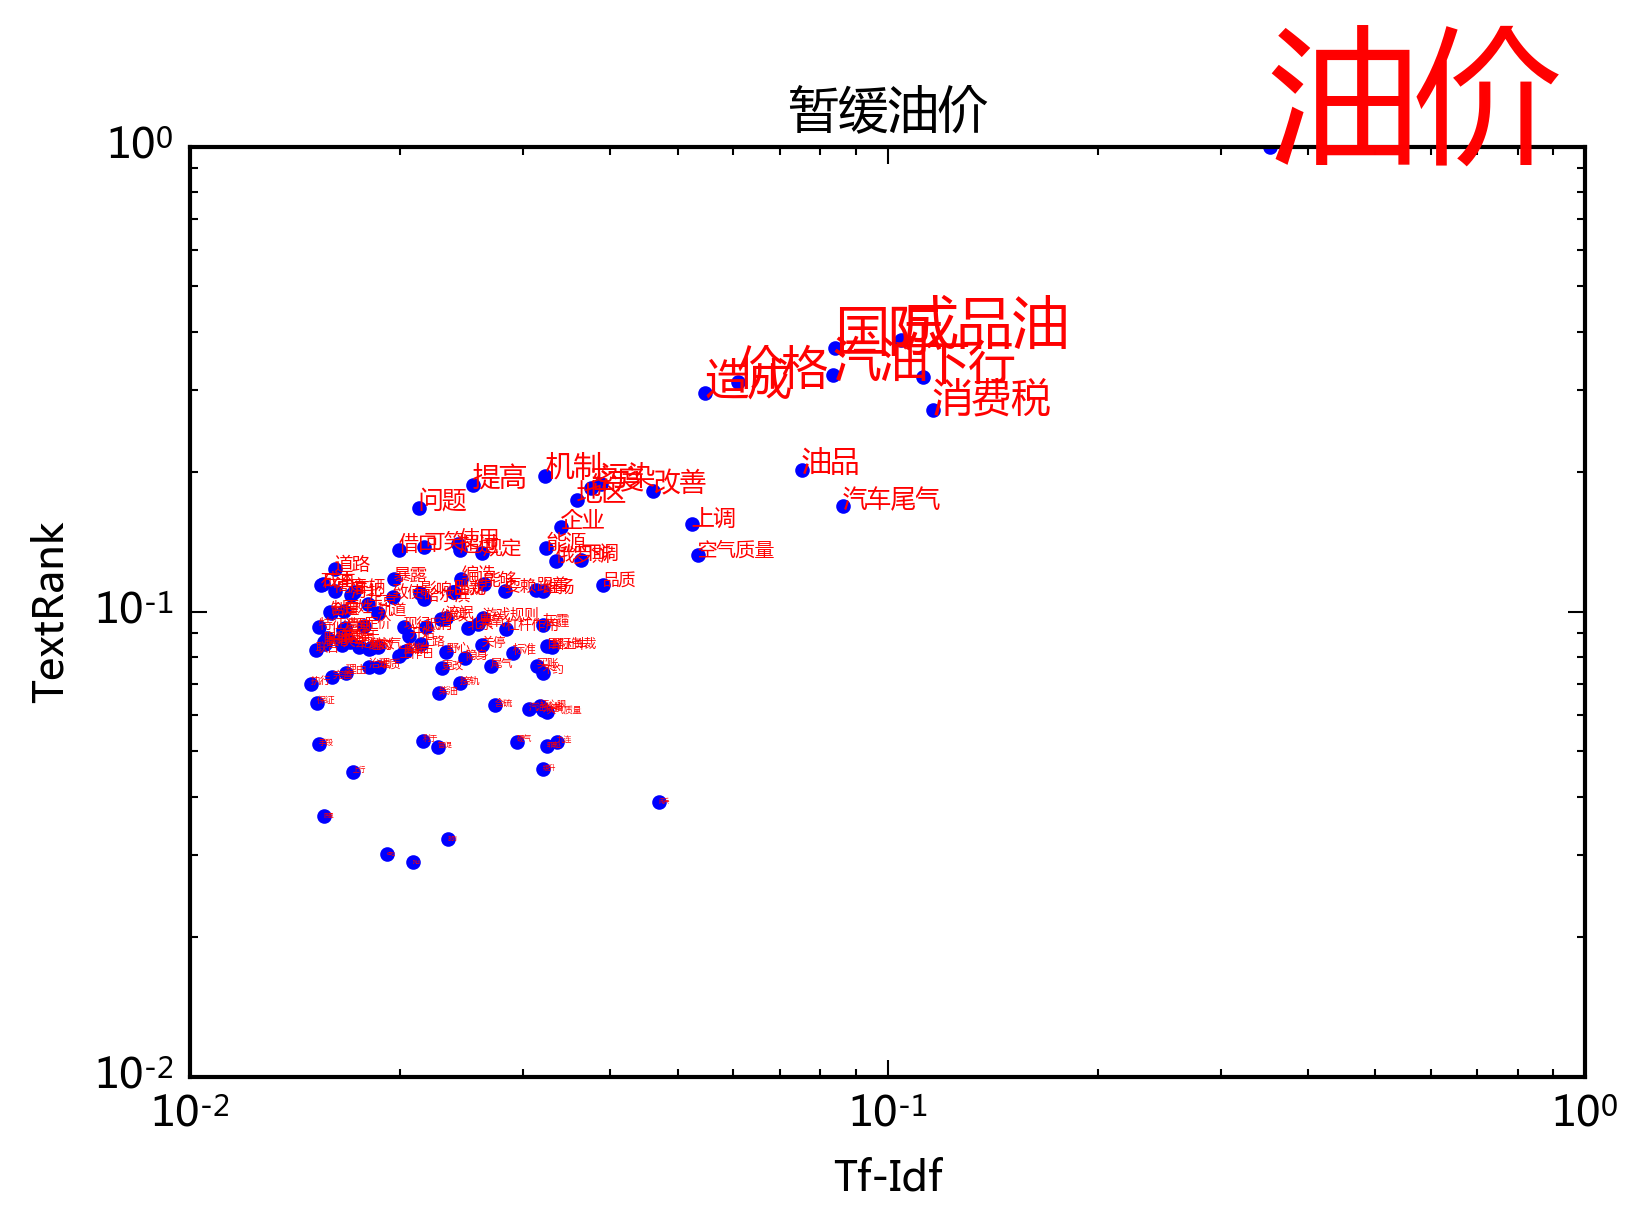

In [213]:
keywords(dt.reply[0].decode('utf8'))

In [289]:
from wordcloud import WordCloud

def wordcloudplot(txt, year):
    wordcloud = WordCloud(font_path='/Users/chengjun/github/cjc2016/data/msyh.ttf').generate(txt)
    # Open a plot of the generated image.
    plt.imshow(wordcloud)
    plt.axis("off")
    #plt.show()

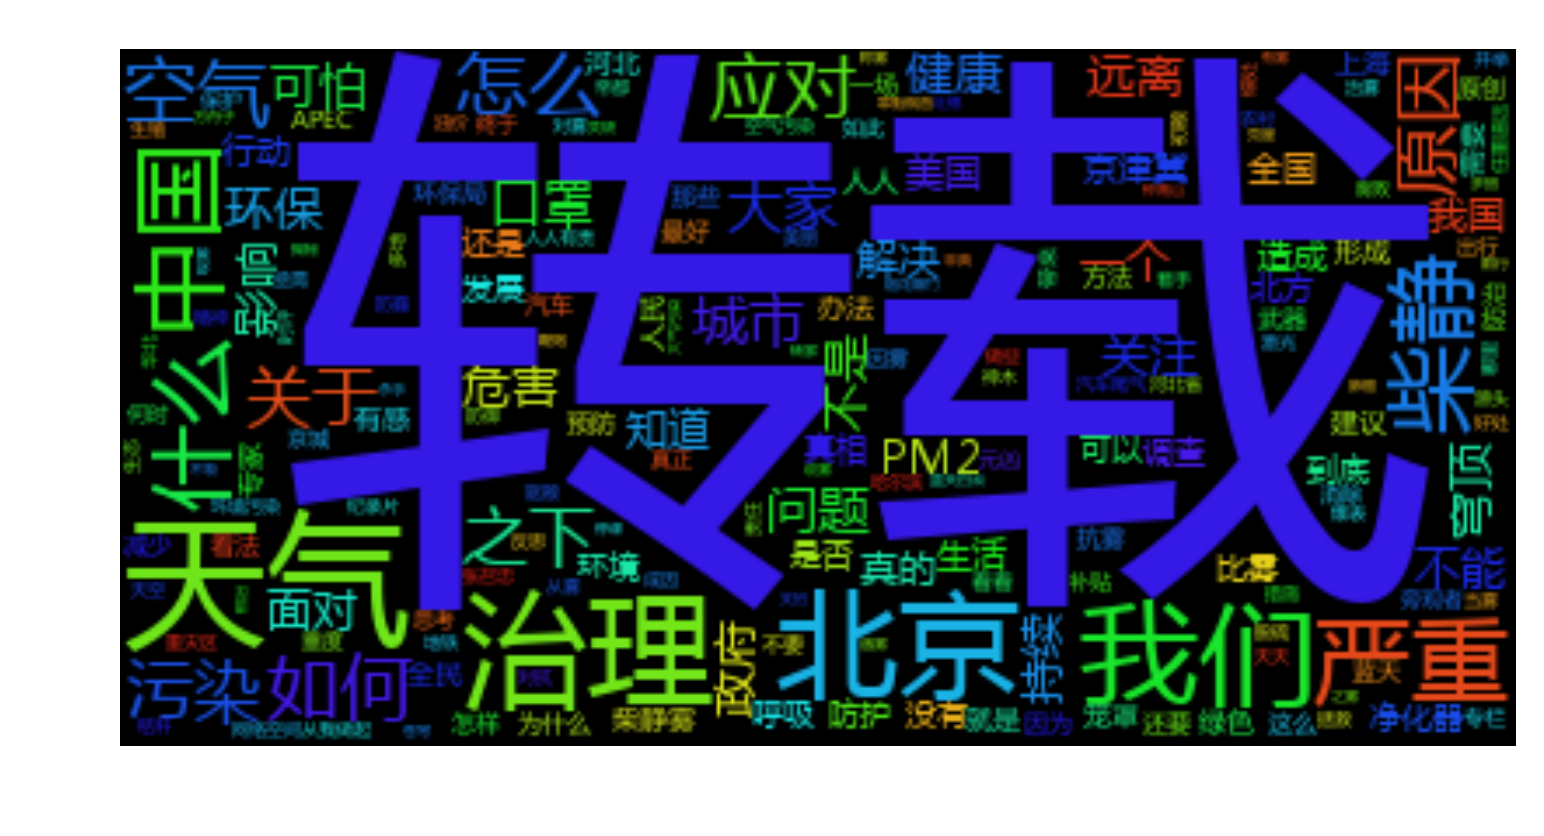

In [290]:
txt = ' '.join(df.title)
txt = txt.decode('utf8')
tfidf200= jieba.analyse.extract_tags(txt, topK=200, withWeight=False)
seg_list = jieba.cut(txt, cut_all=False)
seg_list = [i for i in seg_list if i in tfidf200]
txt200 = r' '.join(seg_list)
wordcloudplot(txt200, txt[:4]) 

In [293]:
# 全部主帖标题以句子为单位计算tfidf
print '\t'.join(tfidf200)

转载	...	天气	治理	柴静	北京	严重	我们	穹顶	PM2	应对	空气	中国	口罩	污染	京津冀	如何	什么	之下	远离	原因	净化器	关于	比雾	柴静雾	危害	怎么	环保	城市	可怕	大家	有感	健康	真相	防护	抗雾	面对	笼罩	关注	APEC	因雾	问题	全民	持续	解决	政府	行动	环保局	真的	到底	呼吸	绿色	北方	环境	网络空间	元凶	造成	蓝天	影响	多地	10	对雾	治雾	从雾	防霾	不是	我国	专栏	时评	从我做起	人人	不能	全国	防治	旁观者	是否	河北	生活	调查	重度	汽车尾气	纪录片	亟需	初散	当雾	张召忠	爆表	细处	美国	人人有责	预防	空气污染	秸秆	知道	出行	专家	帝都	办法	任重道远	驱散	武器	人民	吐槽	有雾	多措	补贴	怎样	最好	原创	烟花爆竹	建议	还是	消除	蓝天白云	何时	看法	思考	需要	一场	一个	哈尔滨	生殖	并举	为什么	京城	减少	方舟子	激光	河北省	克星	发展	遇雾	称雾	12	之雾	限行	....	反思	方法	上海	可以	环境污染	揭秘	重灾区	脱硫	罪魁祸首	大气污染	地铁	华北	肺癌	成因	神木	美丽	形成	根治	好处	防御	着手	天天	鞭炮	保护	就是	终于	杀手	还要	停课	真正	没有	那些	苍穹	腐败	对抗	这么	生态	汽车	哪里	做些	支招	精神	焚烧	带来	钟南山	措施	如此	非典	不要	农村	看看	因为	油价	源头	责任	天空	拯救	说雾	不吸	......	砖家	现雾	11


In [294]:
# 全部回帖以句子为单位计算词的tfidf
txt = ' '.join(dt.reply)
txt = txt.decode('utf8')
tfidf200= jieba.analyse.extract_tags(txt, topK=200, withWeight=False)
print '\t'.join(tfidf200)

2015	03	柴静	12	污染	02	01	10	中国	我们	空气	11	治理	PM2	20	楼主	北京	00	没有	问题	一个	就是	23	2014	28	16	环保	天气	21	可以	排放	环境	不是	这个	13	什么	自己	严重	2013	国家	15	22	14	18	17	美国	城市	知道	09	空气污染	现在	政府	19	04	如果	这样	空气质量	大家	还是	......	30	因为	口罩	50	生活	24	这些	他们	支持	社会	怎么	污染物	08	发展	孩子	25	很多	05	企业	那么	人民	这么	造成	为什么	健康	五毛	不能	但是	负离子	应该	颗粒物	你们	片子	呵呵	时候	27	07	所以	需要	影响	纪录片	大气污染	不要	那些	解决	原因	这种	为了	已经	人们	http	老百姓	希望	能源	看到	其实	汽车	难道	40	一些	危害	私有化	净化器	觉得	可能	地方	呼吸	导致	29	56	真的	还有	26	出现	减少	不会	一样	多少	31	大气	视频	汽车尾气	06	100	人类	产生	开车	世界	经济	是不是	工作	这是	标准	只是	我国	帖子	今天	主要	出来	地区	开始	工业	全国	时间	一定	穹顶	人家	只有	必须	形成	日本	...	59	45	只能	肿瘤	燃煤	别人	48	一点	36	京津冀	有人	作为	一下	所有	尾气	媒体	关注	37	增加	57	或者	肺癌	关系	人体	当然	35	事情	疾病


In [332]:
import gensim
from gensim.models.tfidfmodel import TfidfModel

In [188]:
filename = '/Users/chengjun/github/cjc2016/data/stopwords.txt'
stopwords = {}
f = open(filename, 'r')
line = f.readline().rstrip()
while line:
    stopwords.setdefault(line, 0)
    stopwords[line.decode('utf-8')] = 1
    line = f.readline().rstrip()
f.close()

In [295]:
processed_docs = [cleancntxt(doc, stopwords) for doc in df.title]
word_count_dict = gensim.corpora.Dictionary(processed_docs)
corpus =[word_count_dict.doc2bow(text) for text in processed_docs]
tfidf = gensim.models.TfidfModel(corpus)#使用tf-idf 模型得出的tf-idf 模型
corpus_tfidf = tfidf[corpus]#此处已经计算得出的tf-idf 值

In [300]:
word_tfidf_dict = {}
for doc in corpus_tfidf:
    for index, tfidf in doc:
        token = word_count_dict.get(index)
        if token not in word_tfidf_dict:
            word_tfidf_dict[token] = tfidf
word_tfidf = sorted(word_tfidf_dict.items(), key = lambda x:-x[1]) 

In [311]:
print '   '.join([i[0] +':'+str(i[1]) for i in word_tfidf[:100]])


之灾:1.0   可恶:1.0   清晨:1.0   致雾:1.0   知多少:1.0   身体状况:1.0   拜拜:1.0   爱祖国:1.0   天求:1.0   无罪:1.0   村庄:1.0   始作俑者:1.0   之利:1.0   食品安全:1.0   招惹:1.0   邯郸:1.0   经济学:1.0   之歌:1.0   珍惜:1.0   头疼:1.0   看客:1.0   小事:1.0   科普:1.0   小史:1.0   忧虑:1.0   心灵鸡汤:1.0   罡风:1.0   何时休:1.0   抛砖引玉:1.0   规人:1.0   维护:1.0   芜湖:1.0   解决办法:1.0   围城:1.0   肥胖:1.0   心灵:1.0   人能治雾:1.0   青天:1.0   植树节:1.0   知识:1.0   黑木耳:1.0   之害:1.0   有治:1.0   呼风治雾:1.0   天敌:0.977929261923   双城:0.977929261923   杠上:0.977929261923   再论:0.977929261923   雾国:0.973443250992   茫茫人海:0.960193649851   蔬菜:0.960193649851   势在必行:0.956637188326   第三条:0.956637188326   新法:0.956637188326   未雨绸缪:0.956637188326   之我见:0.946694303759   乡愁:0.943735975392   爱上你:0.943735975392   拥堵:0.942039568923   有效:0.942039568923   散步:0.931854547656   从我做起:0.925329701761   无力:0.925295199824   下泥:0.925117991986   多管齐下:0.92161270552   吸取教训:0.920958807911   有多远:0.913917742798   抛开:0.911613090944   不说:0.911613090944   奇观:0.903632298514   正确看待:0.89934930516   自保:0.89934930516   小常识:0.8

### 找到主帖

In [277]:
link_time_dict = defaultdict(list)
for i in range(len(dt)):
    link_time_dict[dt.link[i]].append(dt.time[i])

thread_time = [np.min(link_time_dict[l]) for l in link_time_dict]
threads = [dt.reply[i] for  i in range(len(dt)) if dt.time[i] in thread_time]

In [319]:
len(threads)

1953

In [330]:
print threads[16]

《时代》周刊题为《中国的超级富豪正为躲避雾霾逃离中国》文章称：胡润研究院2014年1月公布的调查结果显示，中国64%的富人(财富超过160万美元)要么移民到其他国家，要么正在打算这样做，这一数字高于两年前得出的60%的调查结果。中国城市的严重污染有可能让富人远走高飞。（参考消息）　　今年1月，中国与全球化研究智库（CCG）和社会科学文献出版社发布的《中国国际移民报告（2014）》蓝皮书显示，截至2013年，中国海外移民存量已达到934.3万人，23年间增长了128.6％。2013年底发布的胡润百富榜则显示，2013年已经移民、正在申请移民和正考虑移民的富豪比例加起来，比上一年上升了6.7％（达到64％），其中，已经移民的亿万富豪已经占到了三分之一。环境污染成为推动海外移民潮的重要原因，　　雾霾曾是外地人眼中的“北京特产”，以前微博上有个段子流传很广——问：“北漂”的英文翻译是什么？答：Oliver Twist（雾都孤儿）。然而，只用了两三年时间，雾霾就已经从地方性危机升格为了全国性问题——现如今，灰蒙蒙且脏兮兮的空气似乎哪儿都逃不掉，戴着口罩的行人则已成为多数城市街头的惯常风景；身边不断增加的癌症患者，也不断的提醒着我们这是一个“污染至死”的时代。　　在反乌托邦小说《羊毛记》中，未来是一个弥漫着致命毒气的死亡世界，地面不再适合人类居住，人们不得不穴居在地堡中，外面的空气呼吸五秒就会让人开始呕吐，呼吸十秒就会让肺开始融化……今日中国的现实，虽然还没像小说中描绘的那样严峻，但雾霾正让“气候难民”们越来越不敢出门，却是不争的事实。据媒体报道，有的淘宝店主一天能卖出上万个口罩；有些单价数千元甚至数万元的空气净化器，也逐渐成为城市家庭的标配；干净的空气成为奢侈品，“雾霾经济”顺理成章地走进了人们的生活。　　“我们无法决定空气的质量，但可以选择有质量的空气”！在这种口号下，中国的富豪们兵分两路，一个群体移向海外，去国外吸“纯氧”；另一部分依然留在中国，但迁移至环境尚未受到大规模污染的地区。即使是那些本人无法离开的，也开始认真考虑是否先将孩子送回老家，以免受到“毒”害。已有人将被北上广工作的父母送回到老家成长的留守儿童，称作“避尘一代”。　　但要想从雾霾中获得救赎，举家移民海外毕竟是个奢侈的选择，多数人只能指望政府拿出应有的政治决心。这么说，当然不是撇清每个人的责任，但雾霾的形成

In [335]:
import gensim
from gensim.models.tfidfmodel import TfidfModel

In [334]:
processed_docs = [cleancntxt(doc, stopwords) for doc in threads]
word_count_dict = gensim.corpora.Dictionary(processed_docs)
corpus =[word_count_dict.doc2bow(text) for text in processed_docs]
tfidf = gensim.models.TfidfModel(corpus)#使用tf-idf 模型得出的tf-idf 模型
corpus_tfidf = tfidf[corpus]#此处已经计算得出的tf-idf 值

In [336]:
lda_model = gensim.models.LdaModel(corpus_tfidf, num_topics=10, id2word=word_count_dict, passes=10)

/Users/chengjun/anaconda/lib/python2.7/site-packages/gensim/models/ldamodel.py:379: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
  expElogbetad = self.expElogbeta[:, ids]
/Users/chengjun/anaconda/lib/python2.7/site-packages/gensim/models/ldamodel.py:659: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  score += numpy.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, id]) for id, cnt in doc)
/Users/chengjun/anaconda/lib/python2.7/site-packages/gensim/models/ldamodel.py:404: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
  sstats[:, ids] += numpy.outer(expElogthetad.T, cts / phinorm)


In [350]:
def inferTopicNumber(bag_of_words_corpus, num, word_count_dict):
    lda_model = gensim.models.LdaModel(bag_of_words_corpus, num_topics=num, id2word=word_count_dict, passes=10)
    _ = lda_model.print_topics(-1) #use _ for throwaway variables.
    logperplexity = lda_model.log_perplexity(bag_of_words_corpus)
    return logperplexity

perplexity_list = [inferTopicNumber(corpus, num, word_count_dict) for num in [5, 10, 20, 30, 40,50 ]]

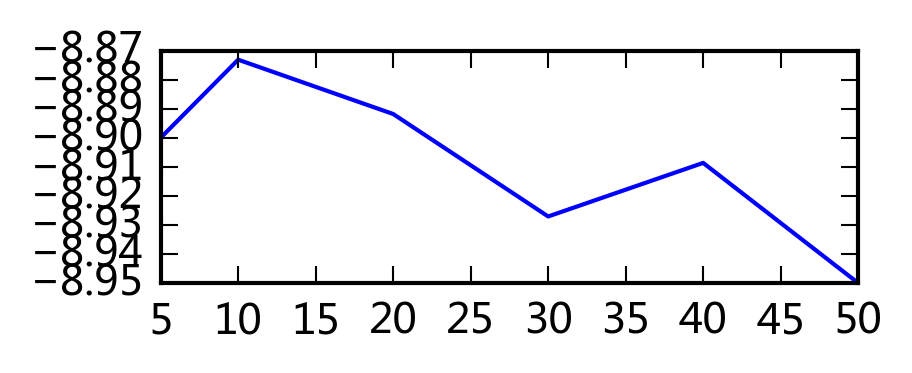

In [356]:
fig = plt.figure(figsize=(3, 1),facecolor='white')
plt.plot([5, 10, 20, 30, 40, 50], perplexity_list)
plt.show()

In [357]:
lda_model50 = gensim.models.LdaModel(corpus_tfidf, num_topics=50, id2word=word_count_dict, passes=10)

In [340]:
for i in lda_model.print_topics():print i

0.000*风电 + 0.000*00 + 0.000*官僚 + 0.000*滴滴 + 0.000*芜湖 + 0.000*成冰 + 0.000*狗狗 + 0.000*泡泡 + 0.000*肺来 + 0.000*儿时
0.001*字数 + 0.000*供暖系统 + 0.000*不足 + 0.000*进口 + 0.000*安利 + 0.000*重构 + 0.000*悟空 + 0.000*哈尔滨 + 0.000*雾里 + 0.000*喇叭
0.002*口罩 + 0.001*天气 + 0.001*空气 + 0.001*PM2 + 0.001*疾病 + 0.001*颗粒物 + 0.001*人体 + 0.001*呼吸道 + 0.001*净化器 + 0.001*室内
0.000*大兴安岭 + 0.000*一万年 + 0.000*遥远 + 0.000*哈哈哈 + 0.000*骆家辉 + 0.000*高油价 + 0.000*发黄 + 0.000*氤氲 + 0.000*看看 + 0.000*一楼
0.000*信贷 + 0.000*学生 + 0.000*老师 + 0.000*学校 + 0.000*教育 + 0.000*油价 + 0.000*围城 + 0.000*公益活动 + 0.000*旁观者 + 0.000*宝宝
0.000*二氧化钛 + 0.000*3M + 0.000*纳米 + 0.000*凑热闹 + 0.000*头皮 + 0.000*羽绒服 + 0.000*不能取消 + 0.000*价格不菲 + 0.000*东莞 + 0.000*先谢
0.000*楼顶 + 0.000*防污 + 0.000*150 + 0.000*女儿 + 0.000*管理员 + 0.000*协商 + 0.000*绿化 + 0.000*尾号 + 0.000*车检 + 0.000*小蝌蚪
0.000*戏谑 + 0.000*树木 + 0.000*不经意 + 0.000*泛滥 + 0.000*定律 + 0.000*谢谢 + 0.000*有用吗 + 0.000*方舟子 + 0.000*乱砍乱伐 + 0.000*鞭炮
0.002*我们 + 0.002*治理 + 0.002*中国 + 0.001*污染 + 0.001*北京 + 0.001*发展 + 0.001*政府 + 0.001*企业 + 0.001*排放 + 0.001

In [342]:
import pyLDAvis.gensim

wumai_data = pyLDAvis.gensim.prepare(lda_model, corpus, word_count_dict)

In [344]:
pyLDAvis.enable_notebook()
pyLDAvis.display(wumai_data)

In [345]:
pyLDAvis.save_html(ap_data, '/Users/chengjun/github/cjc2016/vis/wumai_ldavis.html')

In [358]:
wumai_data50 = pyLDAvis.gensim.prepare(lda_model50, corpus, word_count_dict)
pyLDAvis.display(wumai_data50)

/Users/chengjun/anaconda/lib/python2.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:102: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.00241975747564 and the largest is 0.166231269634.
  RuntimeWarning


In [280]:
word_count_dict.token2id.items()[:3]

[(u'\u6211\u58f0', 27482),
 (u'\u4e0d\u5b66\u65e0\u672f', 24710),
 (u'\u529e\u91d1\u5361', 49575)]

In [281]:
tfidf[[(0,1), (1, 1), (2, 1), (3, 2)]]

[(0, 0.21693308034918893),
 (1, 0.4356687032428518),
 (2, 0.28809835463908023),
 (3, 0.8247012536180353)]

In [282]:
word_tfidf_dict = {}
for doc in corpus_tfidf:
    for index, tfidf in doc:
        token = word_count_dict.get(index)
        if token not in word_tfidf_dict:
            word_tfidf_dict[token] = tfidf
word_tfidf = sorted(word_tfidf_dict.items(), key = lambda x:-x[1]) 

In [283]:
for i, j in word_tfidf[:100]:
    print i,j

如题 1.0
哈哈哈 0.999238866102
滴滴 0.912935684529
芜湖 0.874611088903
00 0.813511871621
狗狗 0.802186752715
不能取消 0.79212304534
泡泡 0.769741177482
廊道 0.76227772539
肺来 0.760479576875
酵素 0.758182929603
祖父 0.730881936019
张二蛋 0.719772407471
尼康 0.704509969132
隐形眼镜 0.699078491909
乡愁 0.692216988316
不限开 0.684980224202
泥炭土 0.683236649806
卡耐基 0.682915842539
亚文化 0.682867807252
仙界 0.680959741637
晓得 0.680788752021
建平 0.680001870383
m3PM2 0.67681350062
象素 0.670629768734
汉中 0.669580278639
圣菲 0.665280875607
染发 0.66461278928
红昼 0.658475752353
小慧 0.658280283935
厨卫 0.653385614362
仓储 0.651044618619
书中 0.642509529552
自贡 0.641689736389
什刹海 0.641407982797
PPP 0.638165952094
私有化 0.633335070237
聚氨酯 0.628071889876
.................. 0.627736533385
三张 0.623989230275
什有 0.623989230275
圣诞老人 0.620787152502
霸王花 0.619749432663
若无其事 0.619373965822
雾霆 0.618689622722
千岛湖 0.61726262693
仪器仪表 0.614447790257
梅西 0.613249133245
油价 0.611428874797
中脉 0.610308509639
RGF 0.608143254374
石燕 0.607262271604
渣土 0.601329584624
平凉 0.59995206815
滚滚而

In [199]:
bag_of_words_corpus[0][:3]

[(0, 1), (1, 1), (2, 1)]

In [205]:
print word_count_dict.values()[0]

再来


In [ ]:
tfidf = TfidfModel(corpus)
print(tfidf[some_doc])
tfidf.save('/tmp/foo.tfidf_model')

In [218]:
def cleancntxt(txt, stopwords):
    tfidf1000= jieba.analyse.extract_tags(txt, topK=1000, withWeight=False)
    seg_generator = jieba.cut(txt, cut_all=False)
    seg_list = [i for i in seg_generator if i not in stopwords]
    seg_list = [i for i in seg_list if i != u' ']
    seg_list = [i for i in seg_list if i in tfidf1000]
    return(seg_list)

def getCnCorpus(data):
    processed_docs = [cleancntxt(doc, stopwords) for doc in data]
    word_count_dict = gensim.corpora.Dictionary(processed_docs)
    print "In the corpus there are", len(word_count_dict), "unique tokens"
    word_count_dict.filter_extremes(no_below=2, no_above=0.5) 
    # word must appear >5 times, and no more than 10% documents
    print "After filtering, in the corpus there are only", len(word_count_dict), "unique tokens"
    bag_of_words_corpus = [word_count_dict.doc2bow(pdoc) for pdoc in processed_docs]
    return bag_of_words_corpus, word_count_dict

# 构建回帖网络

In [49]:
link_author_dict = {}
for i in range(len(df)):
    link_author_dict[df.link[i]] =df.author[i] 

In [53]:
graph = []
for k, tweet in enumerate(dt.reply):
    tweet = tweet.decode('utf8')
    url = dt.link[k]
    RTpattern = r'''@(\w+)\s'''
    persons = re.findall(RTpattern, tweet, re.UNICODE)
    if persons:
        for person in persons:
            graph.append([dt.author_name[k].decode('utf8'), person])
    else:
        graph.append( [dt.author_name[k].decode('utf8'), link_author_dict[url].decode('utf8')]  )
        

In [54]:
len(graph)

31766

In [55]:
import networkx as nx

In [56]:
G = nx.DiGraph()
for x,y in graph:
    if x != y:
        G.add_edge(x,y)


In [57]:
nx.info(G)

'Name: \nType: DiGraph\nNumber of nodes: 11000\nNumber of edges: 17059\nAverage in degree:   1.5508\nAverage out degree:   1.5508'

In [58]:
GU=G.to_undirected(reciprocal=True)
graphs = list(nx.connected_component_subgraphs(GU))

In [59]:
import numpy as np
size = []
for i in graphs:
    size.append(len(i.nodes()))
len(size), np.max(size)

(10008, 571)

In [60]:
gs = []
for i in graphs:
    if len(i.nodes()) >5:
        gs.append(i)
len(gs)

17

In [61]:
for g in gs:
    print len(g.nodes())

571
8
14
8
17
8
8
9
13
10
11
11
7
26
7
10
6


In [62]:
g_max = gs[0]
len(g_max.nodes())

571

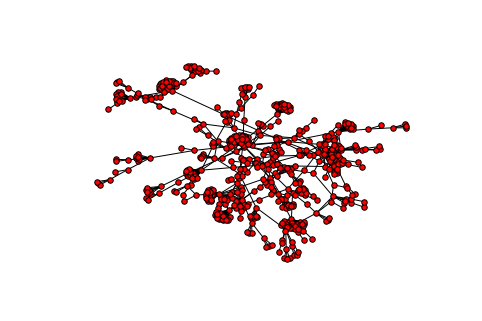

In [30]:
pos = nx.spring_layout(g_max)          
#定义一个布局，此处采用了spectral布局方式，后变还会介绍其它布局方式，注意图形上的区别
nx.draw(g_max,pos,with_labels=False,node_size = 30)  
#绘制规则图的图形，with_labels决定节点是非带标签（编号）,node_size是节点的直径
plt.show()  #显示图形

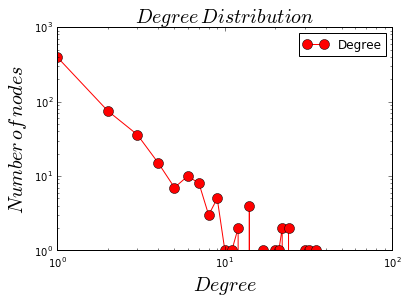

In [123]:
def plotDegreeDistribution(G):
    plt.plot(nx.degree_histogram(G) , 'r-o', markersize = 10)      #返回图中所有节点的度分布序列
    plt.legend(['Degree'])
    plt.xlabel('$Degree$', fontsize = 20)
    plt.ylabel('$Number \, of \, nodes$', fontsize = 20)
    plt.title('$Degree\,Distribution$', fontsize = 20)
    plt.xscale('log')
    plt.yscale('log')
    plt.show()  
     
plotDegreeDistribution(g_max)

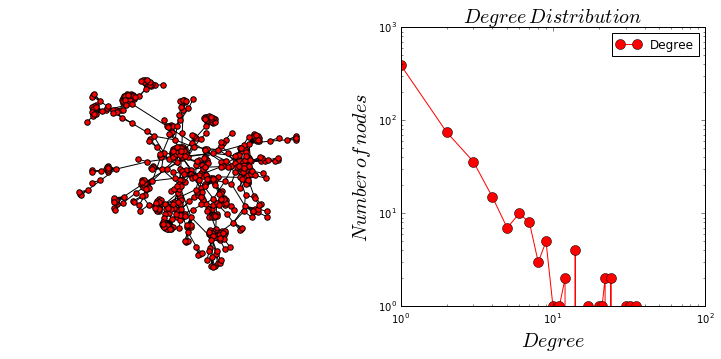

In [124]:
fig = plt.figure(figsize=(12,5))
ax= plt.subplot(121)
nx.draw(g_max,pos,with_labels=False,node_size = 30) 
ax= plt.subplot(122)
plotDegreeDistribution(g_max)
plt.show()  #显示图形

# 补抓数据